In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

import astropy.io.fits as pf
from tslearn.metrics import dtw_path

import utils

In [3]:
def average_of_middle_elements(flux, size=20):
    mid_idx = int(len(flux) / 2)
    mid_values = flux[mid_idx - int(size/2):mid_idx + int(size/2) + 1]
    
    return np.mean(mid_values)

In [4]:
star = 'X0386'
PATH = f'spectra/{star}/'

In [57]:
obs_flux, obs_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0386_V_N_E.fits')
tel_flux, tel_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0386_V_N_E_TRA.fits')
corr_flux, corr_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0386_V_N_E_TAC_final.fits')

In [58]:
obs_avg_flux = average_of_middle_elements(obs_flux)
obs_normalized_flux = obs_flux / obs_avg_flux

corr_avg_flux = average_of_middle_elements(corr_flux)
corr_normalized_flux = obs_flux / corr_avg_flux

In [59]:
LIMIT = 2000

In [60]:
start = time.time()
path, _ = dtw_path(s1=tel_flux[:LIMIT], s2=obs_normalized_flux[:LIMIT], global_constraint='sakoe_chiba')
end = time.time()

print(f'Elapsed time in milliseconds: {(end - start)*1000}')

Elapsed time in milliseconds: 2763.0934715270996


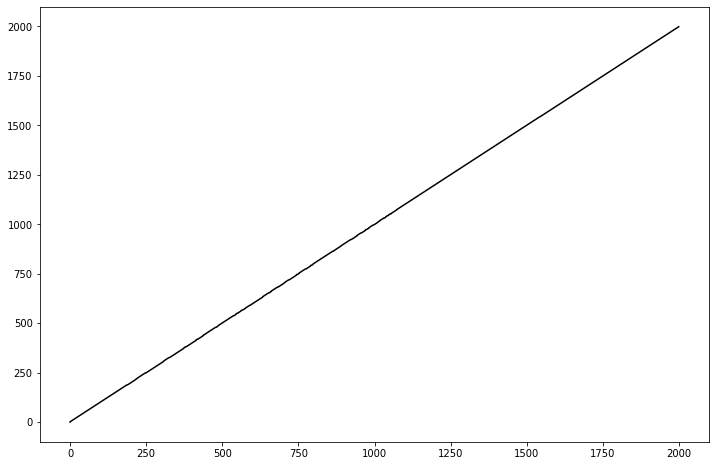

In [61]:
fast_path = list(zip(*path))
plt.plot(fast_path[0], fast_path[1], 'k')
plt.show()

In [62]:
path_dict = defaultdict(list)
for i, j in path:
    path_dict[j].append(i)

In [63]:
original_seq = tel_flux

aligned_seq = []    
for i, j in path_dict.items():
    same_path_idx = [original_seq[t] for t in j]
    aligned_seq.insert(i, np.mean(same_path_idx))

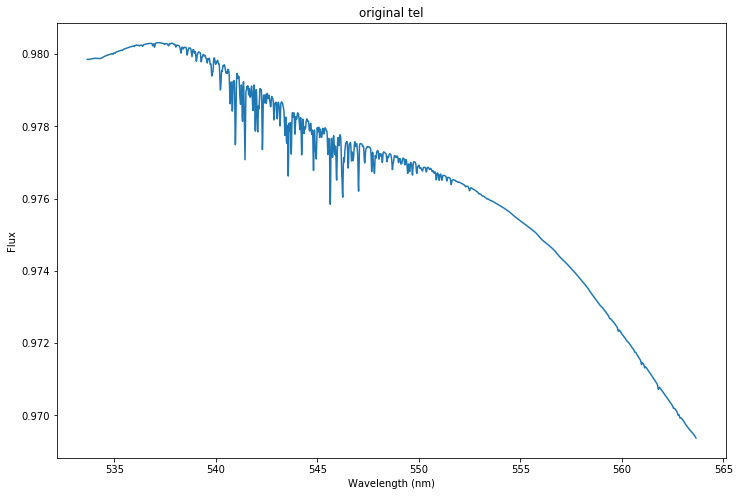

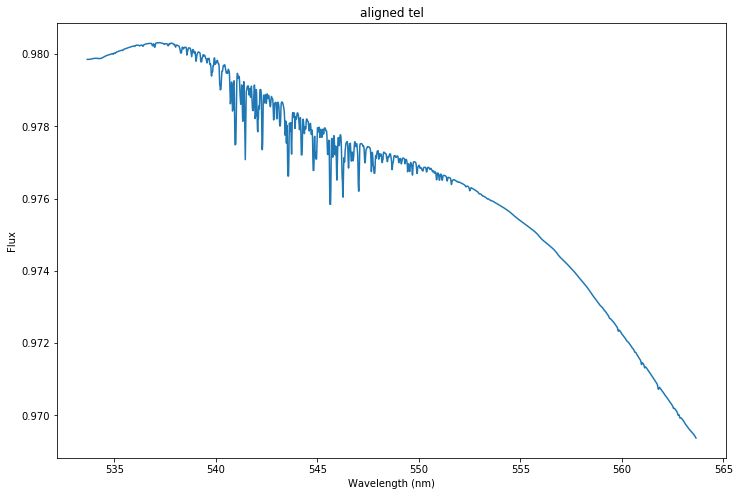

In [64]:
utils.plot_spectrum(tel_flux[:LIMIT], tel_wl[:LIMIT], 'original tel')
utils.plot_spectrum(aligned_seq[:LIMIT], tel_wl[:LIMIT], 'aligned tel')

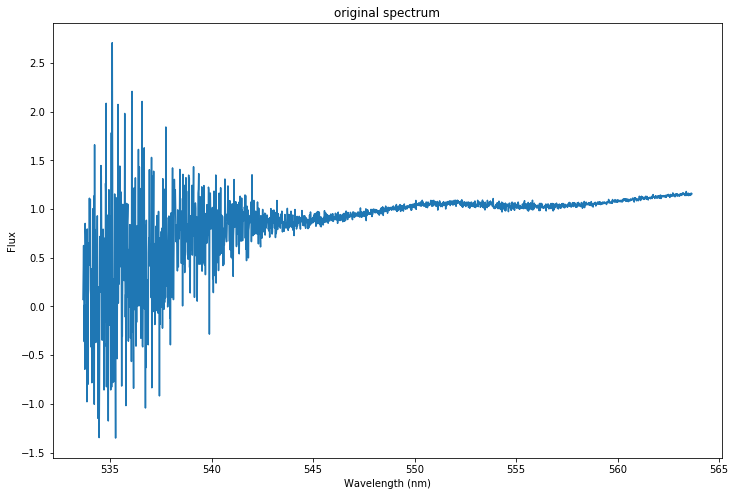

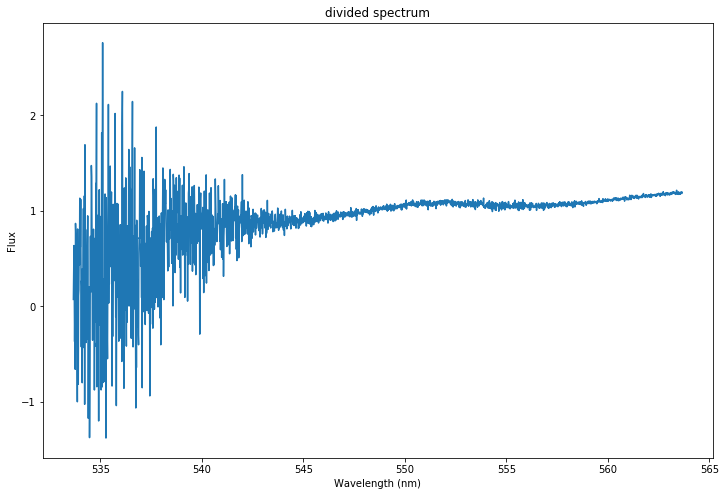

In [65]:
divided_flux = obs_normalized_flux[:LIMIT] / aligned_seq[:LIMIT]

utils.plot_spectrum(obs_normalized_flux[:LIMIT], obs_wl[:LIMIT], 'original spectrum')
utils.plot_spectrum(divided_flux, obs_wl[:LIMIT], 'divided spectrum')

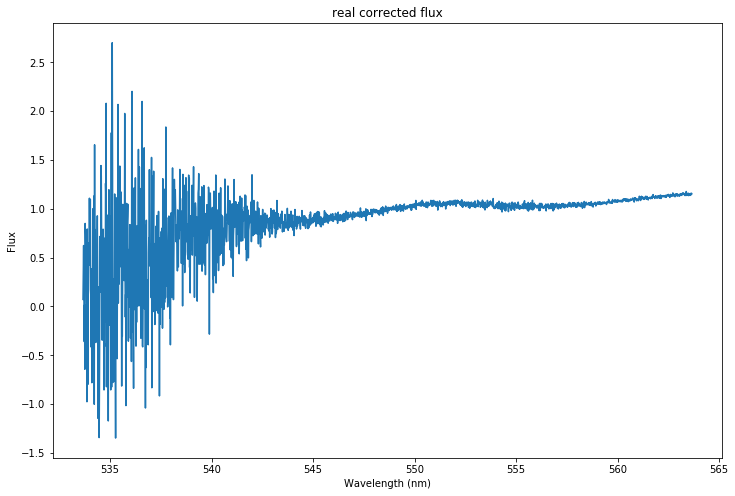

In [66]:
utils.plot_spectrum(corr_normalized_flux[:LIMIT], corr_wl[:LIMIT], 'real corrected flux')

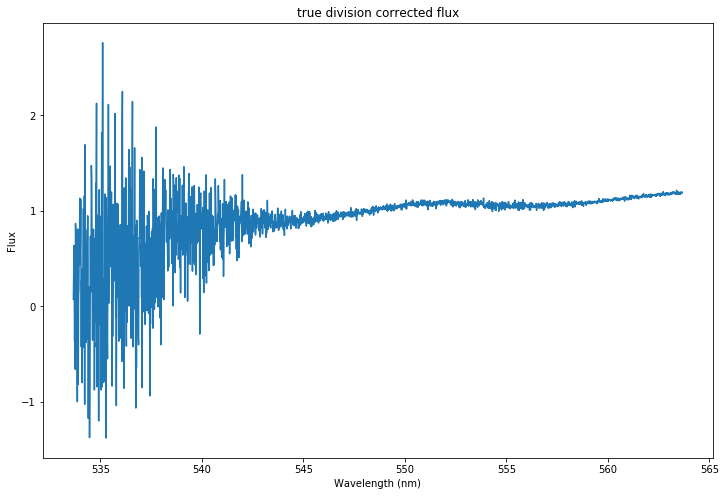

In [67]:
true_divided_spectrum = obs_normalized_flux / original_seq
utils.plot_spectrum(true_divided_spectrum[:LIMIT], obs_wl[:LIMIT], 'true division corrected flux')